In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

df = pd.read_csv('C:\My Space\ML\Datasets\\Titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Missing Indicator

In [14]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [16]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [17]:
mi.features_

array([0])

In [18]:
X_train_missing = mi.transform(X_train)
X_test_missing = mi.transform(X_test)

In [19]:
X_train['Age_NA'] = X_train_missing
X_test['Age_NA'] = X_test_missing

In [20]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [21]:
si = SimpleImputer(add_indicator=True)
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

#### Random Sample Imputation

In [23]:
df = pd.read_csv('C:\My Space\ML\Datasets\Titanic_train.csv',usecols=['Age','Fare','Survived'])
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [24]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\SowmyaMuthuramalinga\AppData\Local\Temp\ipykernel_12688\272970760.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().s

In [25]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 1. , 25. , 31. , 27. , 46. , 45. , 19. , 36. , 29. , 38. , 27. ,
       26. , 25. , 28. , 25. , 36. , 23. , 32. , 30. , 34. , 18. , 41. ,
       62. , 21. , 31. , 28. , 27. , 36. , 19. , 54. , 30. ,  2. ,  4. ,
       16. , 45. , 42. , 29. , 16. , 56. , 20. , 54. , 33. ,  5. , 24. ,
       50. , 23. , 35. , 31. , 30. , 19. , 18. , 44. , 33. , 45. , 16. ,
       32. , 34. , 32. ,  2. , 59. , 35. ,  9. , 52. , 24. , 31. , 29. ,
       33. , 23. , 16. , 29. , 31. , 40. , 40.5, 18. , 25. , 22. , 34. ,
       52. , 21. , 21. , 35. , 43. , 21. , 47. , 40. ,  4. , 24. , 16. ,
       24. , 38. , 27. , 19. , 26. , 25. , 52. , 25. , 58. , 57. , 23. ,
       51. , 27. , 19. , 56. , 35. , 16. , 24. , 41. , 48. , 34. , 40. ,
       58. , 25. , 28. , 21. , 22. , 32. , 26. , 36.5, 31. , 43. , 23. ,
       30. , 50. , 22. , 43. , 35. , 48. , 35. , 29. , 30. , 36. , 58. ,
       24. , 45. , 28. , 38. , 30. , 38. , 24. , 39. , 17. , 18. , 32. ,
       26. , 30. , 16. , 20. , 22. ])

In [26]:
X_train['Age'].isnull().sum()

np.int64(148)

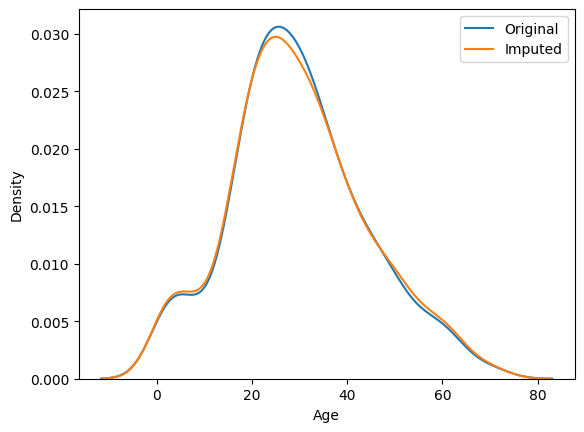

In [32]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [33]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  212.32195779326474


In [34]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,38.575061
Age,71.512440,204.349513,204.349513
Age_imputed,38.575061,204.349513,212.321958


<Axes: >

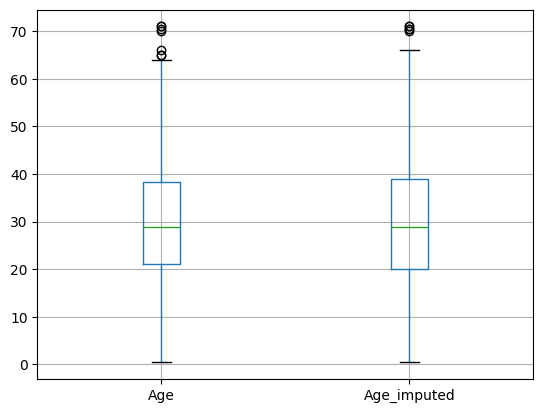

In [35]:
X_train[['Age', 'Age_imputed']].boxplot()

In [38]:
data = pd.read_csv('C:\My Space\ML\Datasets\\train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [39]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [40]:
X = data
y = data['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
830,Gd,TA,166000,TA,Gd
1200,NaN,TA,116050,TA,NaN
1338,NaN,TA,200000,TA,NaN
322,TA,TA,301000,TA,TA
1161,Gd,TA,224000,TA,Gd


In [41]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\SowmyaMuthuramalinga\AppData\Local\Temp\ipykernel_12688\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_tr

In [42]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [44]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.645342
TA,0.412439,0.544332
Fa,0.040917,0.052750
Po,0.027823,0.038159
Ex,0.024550,0.030303


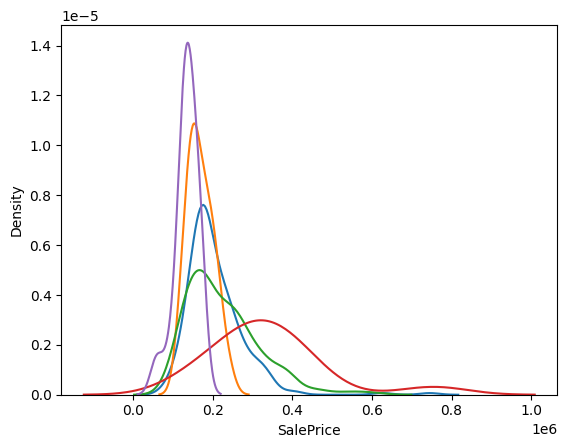

In [46]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

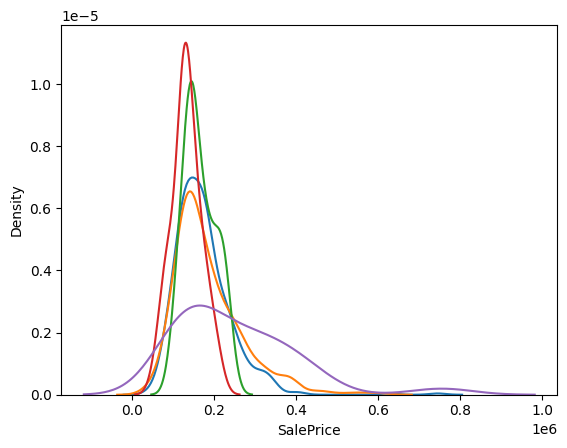

In [47]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()